<a href="https://colab.research.google.com/github/enino84/DataAssimilation202210/blob/main/DA_080202022_Lorenz_96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasts and Numerical Models

# **Duffing Equation**

Duffing Equation

\begin{eqnarray}
x''+\delta x' + \alpha x +\beta x^3= \gamma \cos(\omega t)
\end{eqnarray}

this is equivalent to

\begin{eqnarray}
x''=-\delta x' - \alpha x -\beta x^3+ \gamma \cos(\omega t)
\end{eqnarray}

https://numpy.org/

In [ ]:
import numpy as np

In [ ]:
#(alpha, beta, delta, gamma, omega)
def f(x, t, args=(1, 5, 0.02, 8, 0.65)):
  alpha = args[0];
  beta = args[1];
  delta = args[2];
  gamma = args[3];
  omega = args[4];
  return (x[1], -delta*x[1] - alpha*x[0] - beta * x[0]**3 + gamma * np.cos(omega * t))

In [ ]:
from scipy.integrate import odeint

Initial condition $x'(0) = 1$ and $x(0) = 0$, $t \in [0,\, 200]$, and the sample size equals 200

In [ ]:
x0 = np.array([1, 0], dtype=np.float32);
t = np.linspace(0,200, 1000);

x_samples = [];
samples = 200;
for i in range(0, samples):
  xi = x0 + 0.1*np.random.randn(2,); #perturbation ~ 0.1
  xs = odeint(f, xi, t);
  x_samples.append(xs);


In [ ]:
import matplotlib.pyplot as plt

In the beggining, small perturbations are not amplified

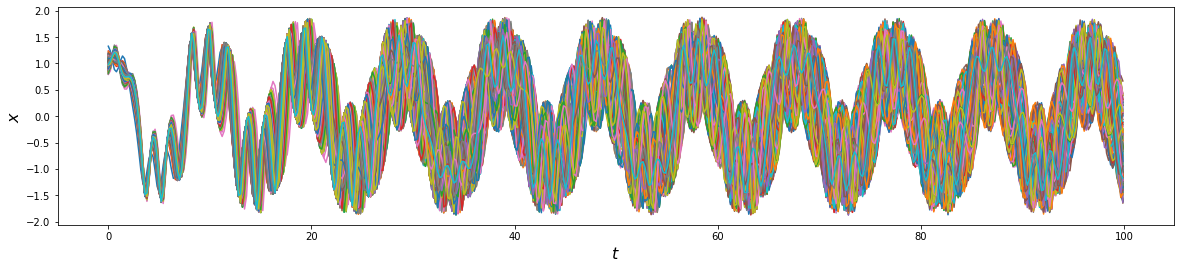

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t[:500], x[:500,0], '-');

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});

At the end, small perturbations have been amplified by the non-linear dynamics of the system

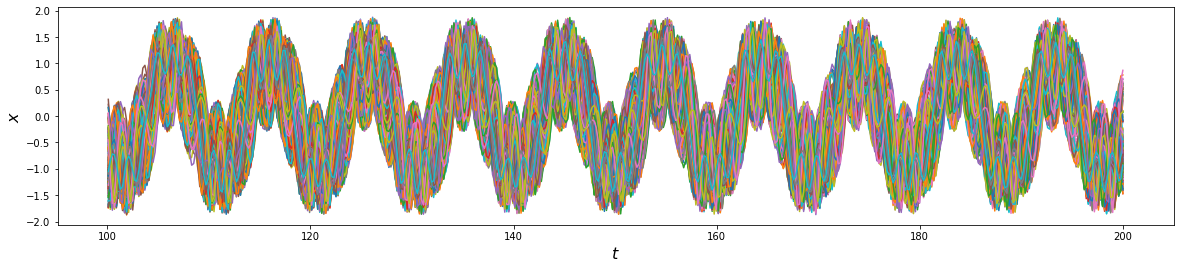

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t[500:], x[500:,0], '-');

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});

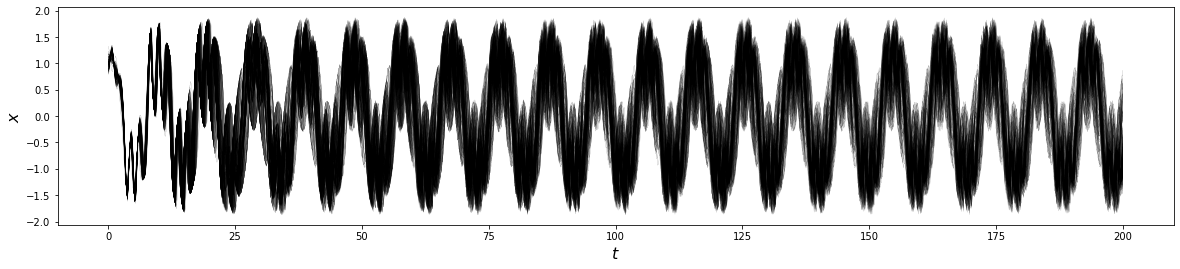

In [ ]:
plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(t, x[:,0], '-k', alpha=.5, lw=0.2);

plt.xlabel('$t$', fontdict={'size':16});
plt.ylabel('$x$', fontdict={'size':16});

Initial distribution (initial conditions)

\begin{eqnarray}
\begin{bmatrix}
x(0) \\
x'(0)
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_0 \\
\epsilon_1
\end{bmatrix}
\end{eqnarray}

where $\epsilon_i \sim \mathcal{N}(0,\, 0.1^2)$

In [ ]:
import seaborn as sns

https://seaborn.pydata.org/

https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot

In [ ]:
samples

200

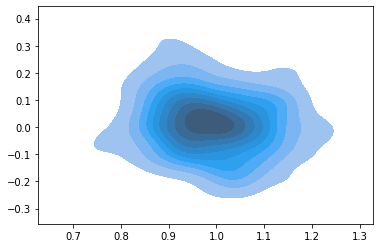

In [ ]:
x_initial = x0.reshape(-1,1) + 0.1*np.random.randn(2,samples)

sns.kdeplot(x=x_initial[0,:], y=x_initial[1,:], fill=True)

Forecast distribution

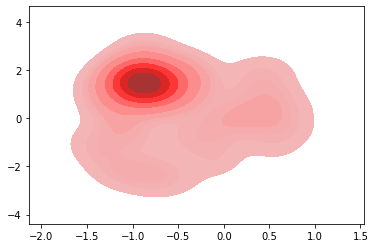

In [ ]:
x_final = np.zeros((samples,2));
for i in range(0, samples):
  x_final[i,:] = x_samples[i][-1,:];

sns.kdeplot(x=x_final[:,0], y=x_final[:,1], fill=True, color='red')

# Tres soluciones

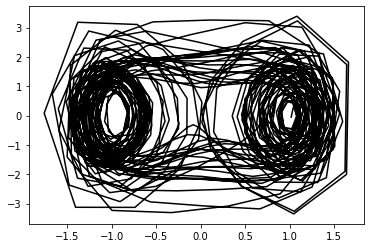

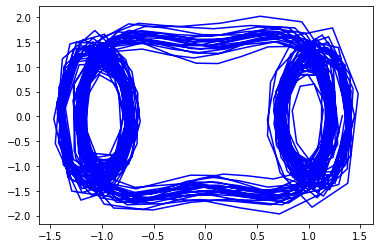

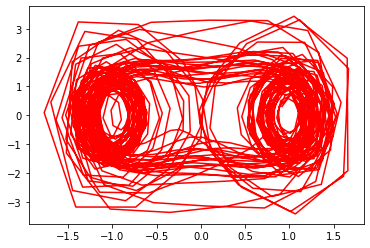

In [ ]:
plt.figure()
plt.plot(x_samples[0][:,0], x_samples[0][:,1], '-k');

plt.figure()
plt.plot(x_samples[100][:,0], x_samples[100][:,1], '-b');

plt.figure()
plt.plot(x_samples[150][:,0], x_samples[150][:,1], '-r');

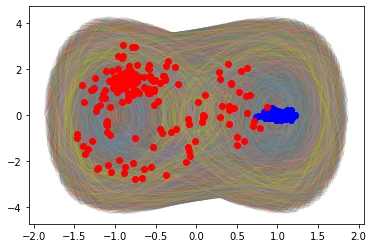

In [ ]:
#plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(x[:,0], x[:,1], '-', alpha=.5, lw=0.2);


plt.plot(x_initial[0,:], x_initial[1,:], 'ob', lw=1);
plt.plot(x_final[:,0], x_final[:,1], 'or', lw=1);

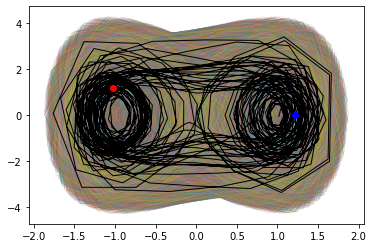

In [ ]:
#plt.figure(figsize=(20,4))
for i in range(0, samples):
  x = x_samples[i];
  plt.plot(x[:,0], x[:,1], '-', alpha=.5, lw=0.2);

plt.plot(x_samples[0][:,0], x_samples[0][:,1], '-k', lw=1);
plt.plot(x_initial[0,0], x_initial[1,0], 'ob', lw=1);
plt.plot(x_final[0,0], x_final[0,1], 'or', lw=1);

Conclusiones:

1. La solución a problemas de valor inicial en Python las llevamos a cabo con `odeint`.

2. Pequeñas perturbaciones en la condición inicial derivan en soluciones finales diferentes producto de la dinámica no lineal del sistema.

3. La distribución del forecast es posible que no sea Normal (múltiples modos)

Implementar:
1. Lorenz 63 - https://es.wikipedia.org/wiki/Atractor_de_Lorenz
2. Lorenz 96 - https://en.wikipedia.org/wiki/Lorenz_96_model

# **Lorenz 96**

\begin{eqnarray}
\frac{dx_i}{dt} = (x_{i+1}-x_{i-2})x_{i-1} - x_i + F
\end{eqnarray}

When $F=8$, the model exhibit chaotic behavior

In [ ]:
def lorenz96(x, t, args=(8,)):
  n = x.size;
  F = args[0];
  return [(x[(i+1)%n]-x[i-2])*x[i-1]-x[i]+F for i in range(0,n)]; #list comprehension

In [ ]:
n = 40;
x0 = np.random.randn(n)
t = np.linspace(0,200, 5000);

xs = odeint(lorenz96, x0, t);

In [ ]:
xs.shape

(5000, 40)

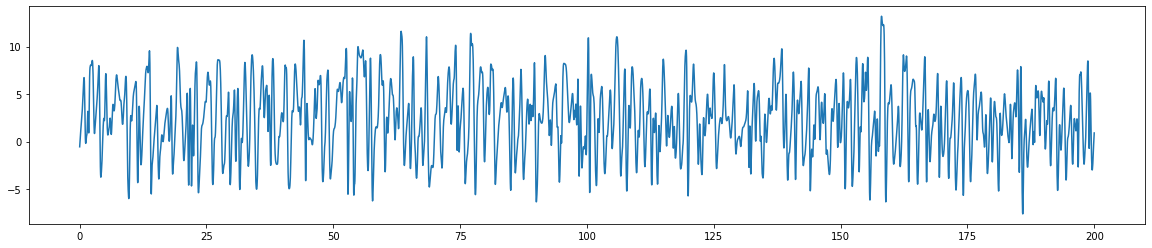

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(t, xs[:,39])

In [ ]:
U, S, V = np.linalg.svd(xs, full_matrices=False)

In [ ]:
U.shape

(5000, 40)

In [ ]:
S[0]/np.sum(S)

0.09965878269106831

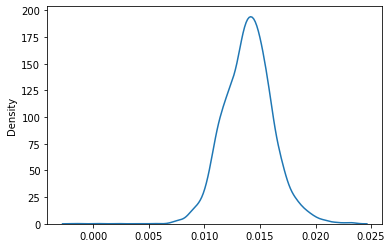

In [ ]:
sns.kdeplot(x=U[:,0])

In [ ]:
np.sum(S[0:2])/np.sum(S)

0.13911550583381194

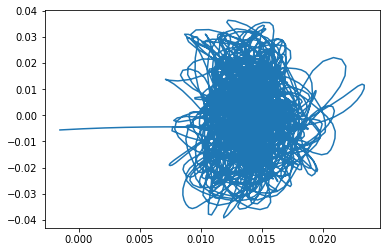

In [ ]:
plt.plot(U[:,0], U[:,1])

In [ ]:
np.sum(S[0:3])/np.sum(S)

0.17801746784912587

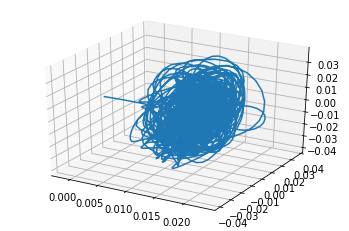

In [ ]:
fig = plt.figure();
ax = plt.axes(projection='3d')
ax.plot3D(U[:,0],U[:,1],U[:,2])

## *Generate Samples*

In [ ]:
n = 40;
x0 = np.random.randn(n)
t = np.linspace(0,5, 1000);
N = 100;
xb = xs[-1,:];
samples = [];
for e in range(0,N):
  xe = xb+0.01*np.random.randn(n);
  xe_new = odeint(lorenz96, xe, t);
  samples.append(xe_new[:,2]);


In [ ]:
trayectorias = np.array(samples, dtype=np.float32);

In [ ]:
trayectorias.shape

(100, 1000)

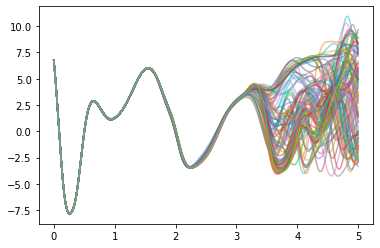

In [ ]:
fig = plt.figure();
for e in range(0,N):
  plt.plot(t, samples[e],'-',alpha=0.5)

Text(0.5, 1.0, 'Time 0')

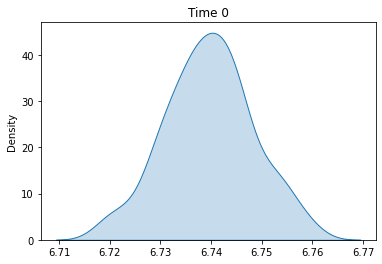

In [ ]:
sns.kdeplot(x=trayectorias[:,0], fill=True)
plt.title('Time 0');

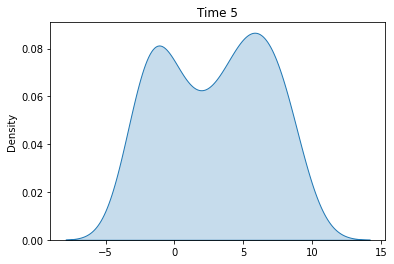

In [ ]:
sns.kdeplot(x=trayectorias[:,-1], fill=True)
plt.title('Time 5');

# **Example Linear Model**

Synthetic Data

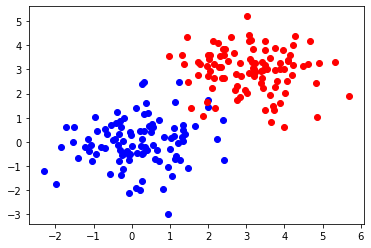

In [ ]:
np.random.seed(10)

n = 100;
y0 = np.zeros((100,));
y1 = np.ones((100,));

X0 = np.array([0,0]) + np.random.randn(100,2)
X1 = np.array([3,3]) + np.random.randn(100,2)

plt.plot(X0[:,0], X0[:,1], 'bo');
plt.plot(X1[:,0], X1[:,1], 'ro');

Problem

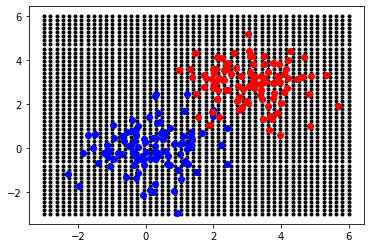

In [ ]:
x = np.linspace(-3,6,50);
y = np.linspace(-3,6,50);

for xi in x:
  for yi in y:
    plt.plot(xi,yi,'.k')


plt.plot(X0[:,0], X0[:,1], 'bo');
plt.plot(X1[:,0], X1[:,1], 'ro');

# $y = \alpha_1 x_1 + \alpha_2 x_2 + \epsilon$

In [ ]:

y = np.hstack((y0,y1));
X = np.vstack((X0,X1));

alp = np.linalg.solve(X.T@X, X.T@y);

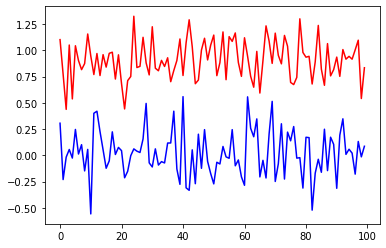

In [ ]:
y_est = X@alp;

plt.plot(y_est[:100], '-b')
plt.plot(y_est[100:], '-r')


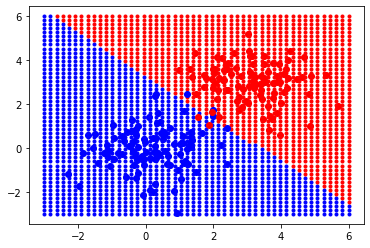

In [ ]:
x = np.linspace(-3,6,50);
y = np.linspace(-3,6,50);

for xi in x:
  for yi in y:
    y_i = xi*alp[0]+yi*alp[1];
    if y_i>0.5:
      plt.plot(xi, yi, 'r.');
    else:
      plt.plot(xi, yi, 'b.');


plt.plot(X0[:,0], X0[:,1], 'bo');
plt.plot(X1[:,0], X1[:,1], 'ro');

# $y = \alpha_1 x_1^2 + \alpha_2 x_2^2 + \epsilon$

In [ ]:
y = np.hstack((y0,y1));
X = np.vstack((X0**2,X1**2));

alp = np.linalg.solve(X.T@X, X.T@y);

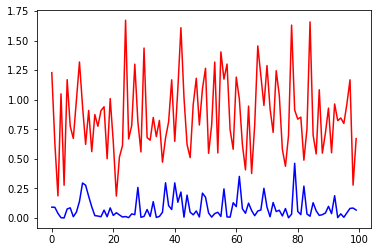

In [ ]:
y_est = X@alp;

plt.plot(y_est[:100], '-b')
plt.plot(y_est[100:], '-r')

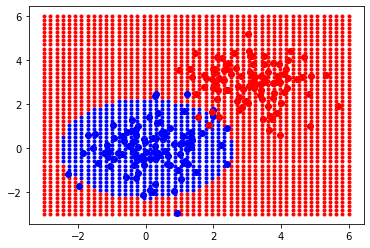

In [ ]:
x = np.linspace(-3,6,50);
y = np.linspace(-3,6,50);

for xi in x:
  for yi in y:
    y_i = alp[0]*(xi**2)+alp[1]*(yi**2);
    if y_i>0.25:
      plt.plot(xi, yi, 'r.');
    else:
      plt.plot(xi, yi, 'b.');


plt.plot(X0[:,0], X0[:,1], 'bo');
plt.plot(X1[:,0], X1[:,1], 'ro');